In [99]:
import pandas as pd

data = pd.read_excel(r'Figures_Data_PreparationBB_new.xlsx', sheet_name = 'Figure 8')


data.head()

data1 = data[["Pol_Inst","Technologie","Mean_Quantity_El_Price_Enduser"]]
#data1["Pol_Inst"]= data1["Pol_Inst"].replace("CO2_Cap", "CO\N{SUBSCRIPT TWO} Cap")
#data1["Pol_Inst"]= data1["Pol_Inst"].replace("CO2_Tax", "CO\N{SUBSCRIPT TWO} Tax")
data1["Pol_Inst"]= data1["Pol_Inst"].replace("Min_RES_Quota", "Min RES Quota")
data1["Technologie"]= data1["Technologie"].replace("Solar", "PV")
data1["Technologie"]= data1["Technologie"].replace("Lit_Ion", "Li-Ion")
data1["Technologie"]= data1["Technologie"].replace("Wind_Onshore", "Wind Onshore")
data1["Technologie"]= data1["Technologie"].replace("Wind_Offshore", "Wind Offshore")
data1["Technologie"]= data1["Technologie"].replace("no", "Base Case")
data2 = data1.dropna()
capacity = data['Pol_Inst'].unique()
types = data['Technologie'].unique()
print(data2)

    Pol_Inst Technologie  Mean_Quantity_El_Price_Enduser
0    CO2_Cap     Lignite                       79.778527
1    CO2_Cap     Lignite                       79.778527
2    CO2_Cap         Gas                       75.831856
3    CO2_Cap         Gas                       77.805192
4    CO2_Cap    Hardcoal                       79.778527
..       ...         ...                             ...
143      FIT    Hardcoal                       96.436821
144      FIT         Gas                       96.638168
145      FIT         Gas                       96.778080
146      FIT     Lignite                       96.560668
147      FIT     Lignite                       96.679576

[148 rows x 3 columns]


<ipython-input-99-3bcf0c4603d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Pol_Inst"]= data1["Pol_Inst"].replace("Min_RES_Quota", "Min RES Quota")
<ipython-input-99-3bcf0c4603d9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Technologie"]= data1["Technologie"].replace("Solar", "PV")
<ipython-input-99-3bcf0c4603d9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [100]:
#
hue1 = ["#9A7B5C", "#C7DADA", "#8D4D4D", "#FFF340", "#5A67FF", "#00B8F2", "#87CD5C", "#51B351", "#404040"]
capacity
types

data5=data2.query("Technologie == 'Base Case'")
data5

data2['Technologie'] = pd.Categorical(data2['Technologie'], [ 'Lignite', 'Gas', 'Hard coal', 'PV', 'Wind Onshore',
       'Wind Offshore', 'Li-Ion', 'PSH', 'Demand'])
data2.sort_values("Technologie")

,Pol_Inst,Technologie,Mean_Quantity_El_Price_Enduser
0,CO2_Cap,Lignite,79.778527
112,FIT,Lignite,96.310849
111,FIT,Lignite,96.181849
110,CO2_Tax,Lignite,79.775864
109,CO2_Tax,Lignite,79.775864
...,...,...,...
115,FIT,NaN,96.358940
116,FIT,NaN,96.428230
129,FIT,NaN,96.436821
142,FIT,NaN,96.436821


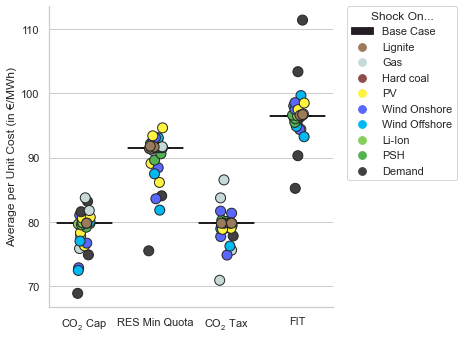

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14.7,11.27)})
sns.set(style="whitegrid")
ax = sns.catplot(x="Pol_Inst",s = 10, y="Mean_Quantity_El_Price_Enduser", hue = "Technologie",linewidth=1, data=data2.query("Technologie != 'Base Case'"), palette = sns.color_palette(["#9A7B5C", "#C7DADA", "#8D4D4D", "#FFF340", "#5A67FF", "#00B8F2", "#87CD5C", "#51B351", "#404040"]))
sns.boxplot(x="Pol_Inst", y="Mean_Quantity_El_Price_Enduser",  hue= "Technologie", data=data5, palette = sns.color_palette(["#261a26"]))
ax.set(xlabel='', ylabel='Average per Unit Cost (in €/MWh)')
ax.set_xticklabels(rotation = 0)
#ax.set_xticklabels("CO\N{SUBSCRIPT TWO} Tax")
ax.set_xticklabels(labels=["$\mathregular{CO_{2}}$ Cap", "RES Min Quota", "$\mathregular{CO_{2}}$ Tax", "FIT"])
ax._legend.set_title("Shock on...")
ax._legend.remove()
#plt.ylim(-0.65,0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Shock On...");

In [102]:
import psutil
import requests
ax.savefig("images/figure8.svg")